<a href="https://colab.research.google.com/github/GhostXu11/Airline-Reservation-System/blob/master/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt 
import io

In [5]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['covid_19_data.csv']))

In [21]:
#data summary
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              14811 non-null  int64  
 1   ObservationDate  14811 non-null  object 
 2   Province/State   7525 non-null   object 
 3   Country/Region   14811 non-null  object 
 4   Last Update      14811 non-null  object 
 5   Confirmed        14811 non-null  float64
 6   Deaths           14811 non-null  float64
 7   Recovered        14811 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 925.8+ KB


In [19]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,14811.000000,14811.000000,14811.000000,14811.000000
mean,7406.000000,1972.956586,102.041928,481.566336
std,4275.711754,10807.777684,872.423090,3993.909230
min,1.000000,0.000000,0.000000,0.000000
25%,3703.500000,6.000000,0.000000,0.000000
50%,7406.000000,69.000000,0.000000,1.000000
75%,11108.500000,458.000000,5.000000,34.000000
max,14811.000000,195749.000000,20465.000000,64727.000000


In [0]:
#convert data
data['Confirmed']=data['Confirmed'].astype(int)
data['Deaths']=data['Deaths'].astype(int)
data['Recovered']=data['Recovered'].astype(int)

In [24]:
data.drop(['SNo'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ObservationDate  14811 non-null  object
 1   Province/State   7525 non-null   object
 2   Country/Region   14811 non-null  object
 3   Last Update      14811 non-null  object
 4   Confirmed        14811 non-null  int64 
 5   Deaths           14811 non-null  int64 
 6   Recovered        14811 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 810.1+ KB


In [25]:
data.isnull().any()

ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [26]:
data[data.isnull().any(axis=1)]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,01/22/2020,NaN,Japan,1/22/2020 17:00,2,0,0
36,01/22/2020,NaN,Thailand,1/22/2020 17:00,2,0,0
37,01/22/2020,NaN,South Korea,1/22/2020 17:00,1,0,0
73,01/23/2020,NaN,Japan,1/23/20 17:00,1,0,0
74,01/23/2020,NaN,Thailand,1/23/20 17:00,3,0,0
...,...,...,...,...,...,...,...
14667,04/13/2020,NaN,West Bank and Gaza,2020-04-13 23:15:42,308,2,58
14668,04/13/2020,NaN,Western Sahara,2020-04-13 23:15:42,6,0,0
14669,04/13/2020,NaN,Yemen,2020-04-13 23:15:42,1,0,0
14670,04/13/2020,NaN,Zambia,2020-04-13 23:15:42,45,2,30


In [57]:
print('Most affected countries are:',data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False))
print('Most affected countries are:',data.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False))
print('Most affected country is China with:',data.loc[data['Country/Region'] == 'Mainland China'].sum())
print('Most affected country is US with:',data.loc[data['Country/Region'] == 'US'].sum())

Most affected countries are: Country/Region
US                       6278333
Mainland China           5239552
Italy                    2977220
Spain                    2574017
Germany                  1986316
                          ...   
North Ireland                  1
Republic of the Congo          1
East Timor                     1
Channel Islands                1
 Azerbaijan                    1
Name: Confirmed, Length: 220, dtype: int64
Most affected countries are: Province/State
Hubei                    4318729
New York                 2302585
New Jersey                664824
Michigan                  275888
California                272779
                          ...   
Montgomery County, TX          0
External territories           0
Recovered                      0
American Samoa                 0
Jervis Bay Territory           0
Name: Confirmed, Length: 297, dtype: int64
Most affected country is China with: ObservationDate    01/22/202001/22/202001/22/202001/22/202001/2

In [46]:
# number of effected countries
a = list(data['Country/Region'].unique()) 
len(a)

220

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,9)
plt.figure(figsize=(16,9))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

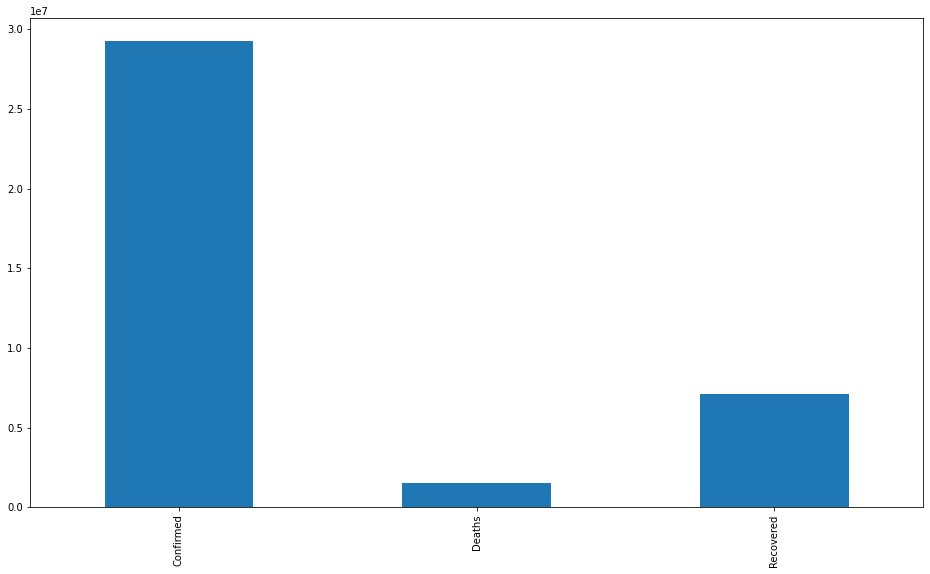

In [48]:
data[['Confirmed', 'Deaths', 'Recovered']].sum().plot(kind='bar')

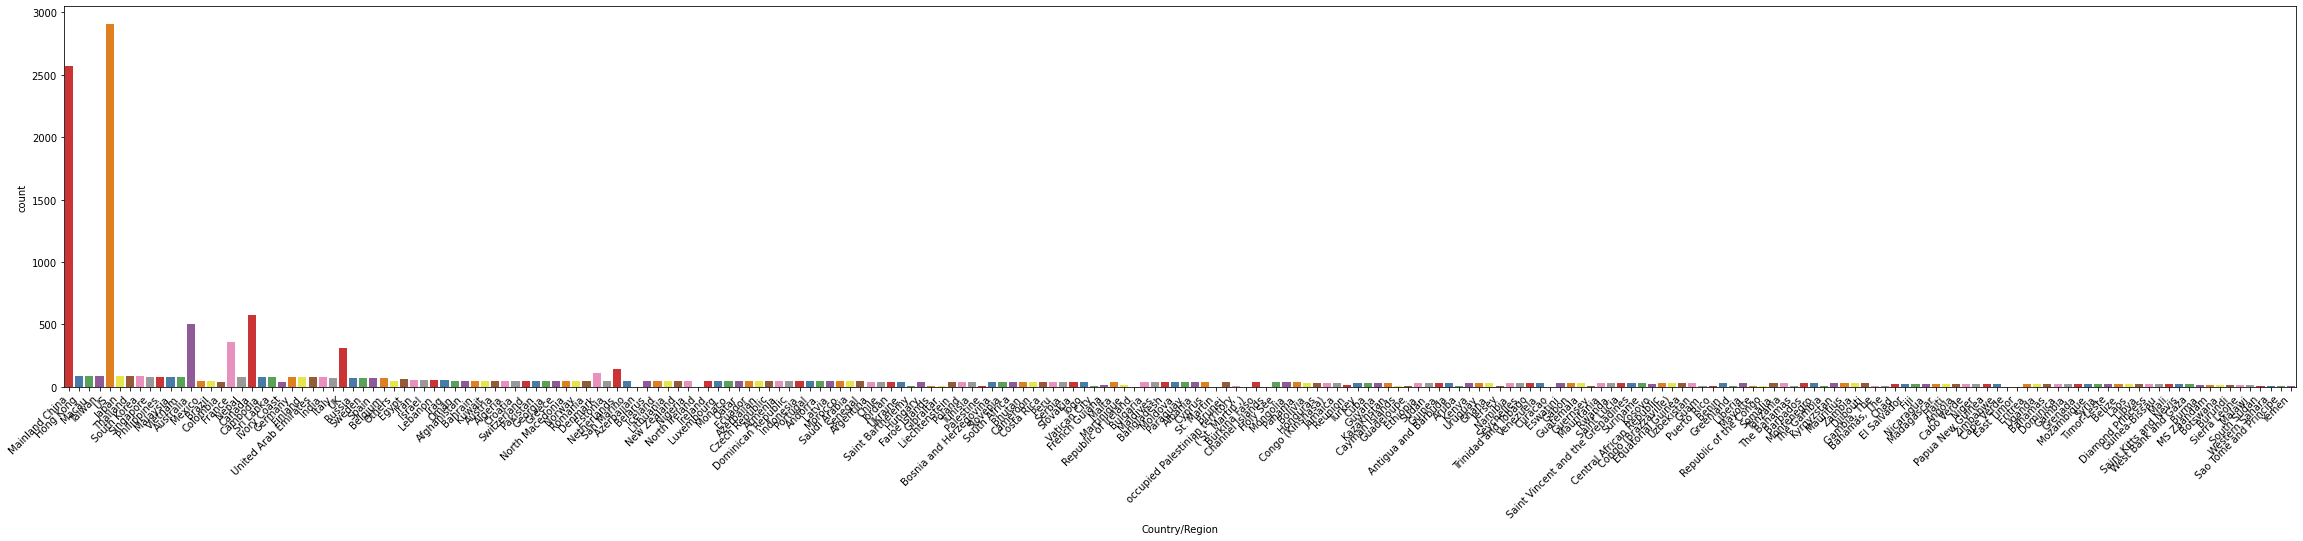

In [54]:
plt.figure(figsize=(40,7))
chart = sns.countplot(data=data, x='Country/Region', palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light');

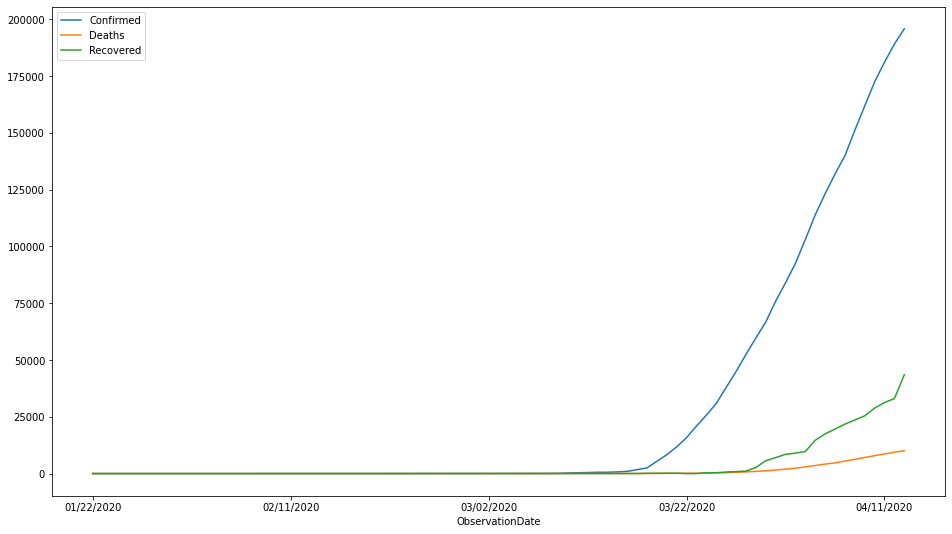

In [60]:
data[data['Country/Region']== "US"].groupby('ObservationDate').max().plot(kind='line')

In [0]:
#PREDICTION

In [0]:
confirmed_training_dataset = pd.DataFrame(data.groupby('ObservationDate')['Confirmed'].sum().reset_index()).rename(columns={'Date': 'x', 'Confirmed': 'y'})
X_confirmed = np.array(confirmed_training_dataset.y)
X_confirmed_train=X_confirmed[:20, None]
X_confirmed_test=X_confirmed[20:, None]

In [0]:
death_training_dataset = pd.DataFrame(data.groupby('ObservationDate')['Deaths'].sum().reset_index()).rename(columns={'Date': 'x', 'Deaths': 'y'})
X_death = np.array(death_training_dataset.y)
X_death_train=X_death[:20, None]
X_death_test=X_death[20:, None]

In [0]:
recovered_training_dataset = pd.DataFrame(data.groupby('ObservationDate')['Recovered'].sum().reset_index()).rename(columns={'Date': 'x', 'Recovered': 'y'})
X_recovered = np.array(recovered_training_dataset.y)
X_recovered_train=X_recovered[:20, None]
X_recovered_test=X_recovered[20:, None]

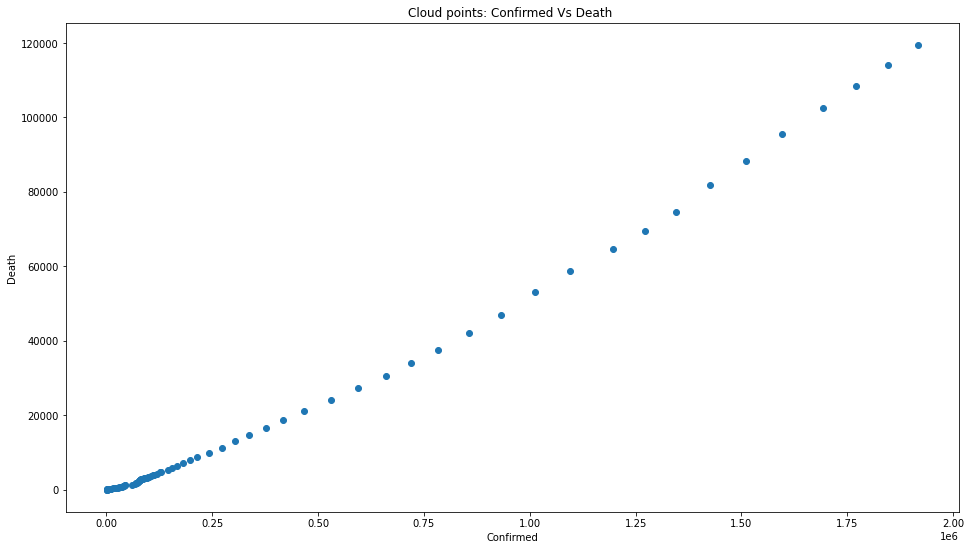

In [66]:
plt.scatter(X_confirmed,X_death)

plt.title('Cloud points: Confirmed Vs Death ')
plt.xlabel('Confirmed')
plt.ylabel('Death')

plt.show()

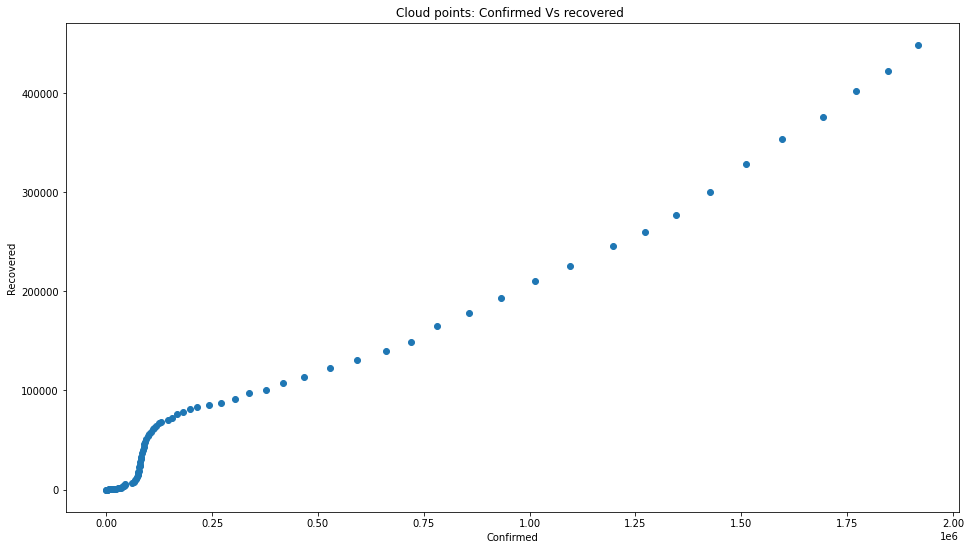

In [67]:
plt.scatter(X_confirmed,X_recovered)
plt.title('Cloud points: Confirmed Vs recovered ')
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
reg_death = LinearRegression().fit(X_confirmed_train, X_death_train)
reg_recovered = LinearRegression().fit(X_confirmed_train, X_recovered_train)

In [69]:
reg_death.predict(X_death_test)

array([[  23.59389848],
       [  23.70322796],
       [  29.23530003],
       [  32.55891645],
       [  35.68573979],
       [  37.95979312],
       [  40.10265108],
       [  43.14201083],
       [  45.65658904],
       [  48.38982623],
       [  48.47728982],
       [  53.0035306 ],
       [  53.24405547],
       [  56.74259907],
       [  58.47000497],
       [  59.82569061],
       [  60.7877901 ],
       [  62.05601216],
       [  63.56475908],
       [  64.76738344],
       [  66.71344832],
       [  68.35339063],
       [  70.408785  ],
       [  72.46417936],
       [  74.91315988],
       [  77.05601783],
       [  82.41316272],
       [  86.63328093],
       [  92.44960966],
       [ 100.16827148],
       [ 102.46419071],
       [ 117.42046459],
       [ 126.49481205],
       [ 140.07353439],
       [ 155.07354007],
       [ 172.10707421],
       [ 190.21203733],
       [ 215.00796508],
       [ 246.31993028],
       [ 282.92344268],
       [ 319.00217353],
       [ 359.978

In [70]:

reg_recovered.predict(X_recovered_test)

array([[1.26232461e+01],
       [4.75955057e+01],
       [1.33341196e+02],
       [2.65367092e+02],
       [3.65491099e+02],
       [4.75575085e+02],
       [6.04231063e+02],
       [7.36706282e+02],
       [8.69181501e+02],
       [1.02314931e+03],
       [1.07654379e+03],
       [1.37579250e+03],
       [1.41383513e+03],
       [1.55110312e+03],
       [1.75165068e+03],
       [1.93729572e+03],
       [2.15394400e+03],
       [2.41110618e+03],
       [2.64108436e+03],
       [2.86080301e+03],
       [3.07692708e+03],
       [3.27365540e+03],
       [3.49397315e+03],
       [3.69062658e+03],
       [3.84556792e+03],
       [4.03226137e+03],
       [4.20719756e+03],
       [4.34326735e+03],
       [4.48495368e+03],
       [4.67958517e+03],
       [4.77851098e+03],
       [4.92281835e+03],
       [5.10052536e+03],
       [5.35589025e+03],
       [5.50970829e+03],
       [5.71579749e+03],
       [5.90099320e+03],
       [6.02448197e+03],
       [6.20728130e+03],
       [6.52727373e+03],


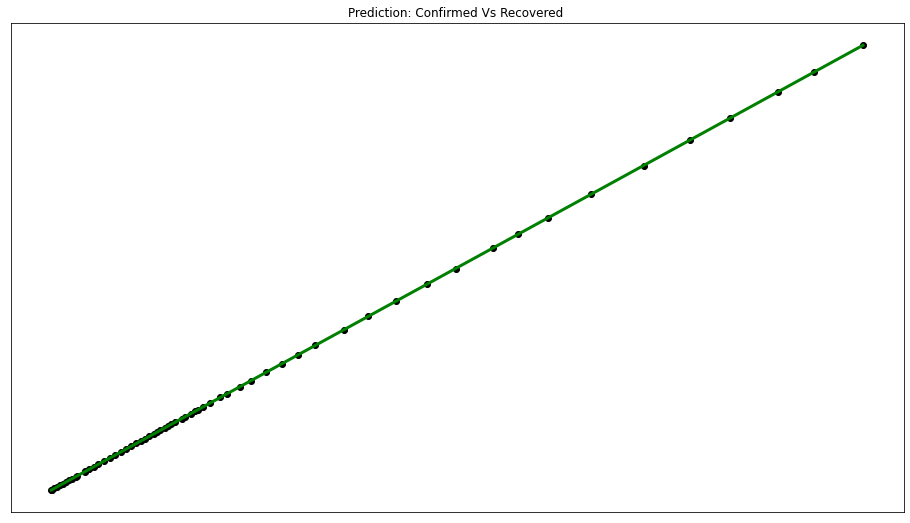

In [71]:
plt.title('Prediction: Confirmed Vs Recovered ')
plt.scatter(X_recovered_test, X_recovered_test,  color='black')
plt.plot(X_recovered_test, X_recovered_test, color='green', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

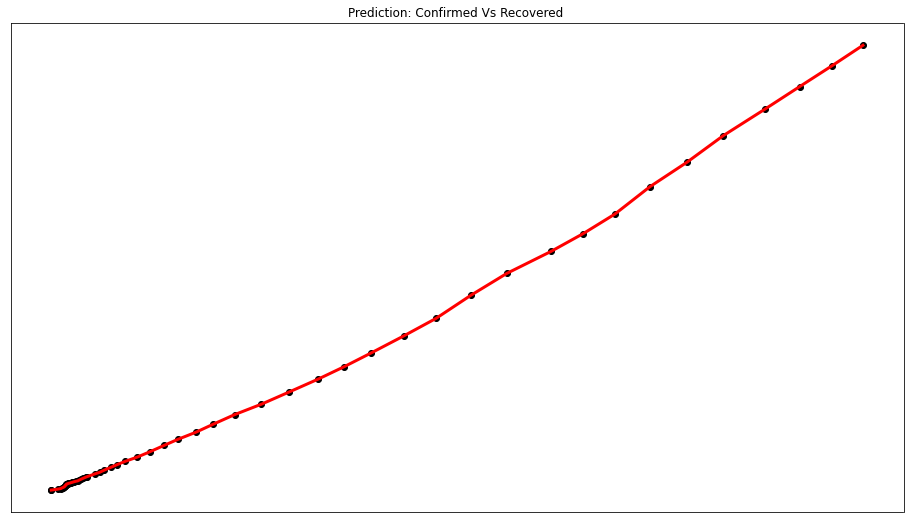

In [75]:
plt.title('Prediction: Confirmed Vs Recovered ')
plt.scatter(X_confirmed_test, X_death_test,  color='black')
plt.plot(X_confirmed_test, X_death_test, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [73]:
reg_death.predict([[1000000],])#predict the death rate when No. of persons with confirmed coronavirus is 1M

array([[21865.15464223]])

In [74]:
reg_recovered.predict([[1000000],])#predict the recovering rate when No. of persons with confirmed coronavirus is 1M


array([[74548.99258026]])